In [32]:
from math import sin, cos, log, ceil
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
# model parameters:
g = 9.8      # gravity in m s^{-2}
v_t = 30.0   # trim velocity in m s^{-1}   
C_D = 1/40  # drag coefficient --- or D/L if C_L=1
C_L = 1   # for convenience, use C_L = 1

### set initial conditions ###
x0 = 0     # horizotal position is arbitrary
y0 = 1000  # initial altitude (meters)
theta0= 0 # initial angle of trajectory
v0 = v_t     # start at the trim velocity (or add a delta)

In [3]:
def f(u):
    """Returns the right-hand side of the phugoid system of equations.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt or f(u) : array of float
        array containing the RHS given u.
    """
    
    v = u[0]
    theta = u[1]
    x = u[2]
    y = u[3]
    return numpy.array([-g*sin(theta) - C_D/C_L*g/v_t**2*v**2,
                      -g*cos(theta)/v + g/v_t**2*v,
                      v*cos(theta),
                      v*sin(theta)])

In [4]:
def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

In [5]:
T = 100                          # final time
dt = 0.1                           # time increment
N = int(T/dt) + 1                  # number of time-steps
t = numpy.linspace(0, T, N)      # time discretization


In [6]:
print(N)

1001


In [7]:
# initialize the array containing the solution for each time-step
u = numpy.empty((N, 4))
u[0] = numpy.array([v0, theta0, x0, y0])# fill 1st element with initial values

# time loop - Euler method
for n in range(N-1):  #this range goes from 0 to 999 
    
    u[n+1] = euler_step(u[n], f, dt)

In [8]:
numpy.shape(u)

(1001, 4)

In [9]:
print(u[1,:])

[  2.99755000e+01  -5.55111512e-18   3.00000000e+00   1.00000000e+03]


Plot x,y positions of glider

In [10]:
x = u[:,2]
y = u[:,3]

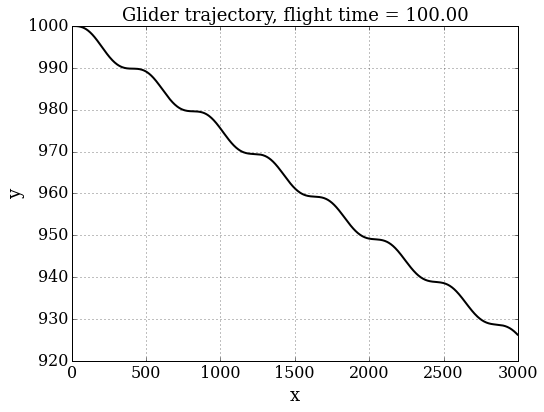

In [11]:
# visualization of the path
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.title('Glider trajectory, flight time = %.2f' % T, fontsize=18)
pyplot.plot(x,y, 'k-', lw=2);

Grid Convergence

In [12]:
dt_values = numpy.array([0.1, 0.05, 0.01, 0.005, 0.001])

u_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    
    N = int(T/dt) + 1    # number of time-steps
    #print(N)
    
    ### discretize the time t ###
    t = numpy.linspace(0.0, T, N)
    print(N,len(t))
    
    # initialize the array containing the solution for each time-step
    u = numpy.empty((N, 4))
    #print(numpy.shape(N))
    u[0] = numpy.array([v0, theta0, x0, y0])

    # time loop
    for n in range(N-1):
       
        u[n+1] = euler_step(u[n], f, dt)   ### call euler_step() ###
    
    # store the value of u related to one grid
    u_values[i] = u

1001 1001
2001 2001
10001 10001
20001 20001
100001 100001


In [13]:
numpy.shape(u_values[:])

(5,)

In [14]:
print(N)

100001


In [15]:
def get_diffgrid_v(u_current, u_fine, dt):
    """Returns the difference between one grid and the fine one using L-1 norm.
    
    Parameters
    ----------
    u_current : array of float
        solution on the current grid.
    u_finest : array of float
        solution on the fine grid.
    dt : float
        time-increment on the current grid.
    
    Returns
    -------
    diffgrid : float
        difference computed in the L-1 norm.
    """
    
    N_current = len(u_current[:,0])
    N_fine = len(u_fine[:,0])
   
    grid_size_ratio = ceil(N_fine/N_current)  
    #ceil() returns the ceiling of x as a float, the smallest integer value greater than or equal to x.
    
    diffgrid = dt * numpy.sum( numpy.abs(\
            u_current[:,0]- u_fine[::grid_size_ratio,0])) 
    
    return diffgrid

In [16]:
def get_diffgrid_theta(u_current, u_fine, dt):
    """Returns the difference between one grid and the fine one using L-1 norm.
    
    Parameters
    ----------
    u_current : array of float
        solution on the current grid.
    u_finest : array of float
        solution on the fine grid.
    dt : float
        time-increment on the current grid.
    
    Returns
    -------
    diffgrid : float
        difference computed in the L-1 norm.
    """
    
    N_current = len(u_current[:,0])
    N_fine = len(u_fine[:,0])
   
    grid_size_ratio = ceil(N_fine/N_current)  
    #ceil() returns the ceiling of x as a float, the smallest integer value greater than or equal to x.
    
    diffgrid = dt * numpy.sum( numpy.abs(\
            u_current[:,1]- u_fine[::grid_size_ratio,1])) 
    
    return diffgrid

In [17]:
def get_diffgrid_x(u_current, u_fine, dt):
    """Returns the difference between one grid and the fine one using L-1 norm.
    
    Parameters
    ----------
    u_current : array of float
        solution on the current grid.
    u_finest : array of float
        solution on the fine grid.
    dt : float
        time-increment on the current grid.
    
    Returns
    -------
    diffgrid : float
        difference computed in the L-1 norm.
    """
    
    N_current = len(u_current[:,0])
    N_fine = len(u_fine[:,0])
   
    grid_size_ratio = ceil(N_fine/N_current)  
    #ceil() returns the ceiling of x as a float, the smallest integer value greater than or equal to x.
    
    diffgrid = dt * numpy.sum( numpy.abs(\
            u_current[:,2]- u_fine[::grid_size_ratio,2])) 
    
    return diffgrid

In [18]:
def get_diffgrid_y(u_current, u_fine, dt):
    """Returns the difference between one grid and the fine one using L-1 norm.
    
    Parameters
    ----------
    u_current : array of float
        solution on the current grid.
    u_finest : array of float
        solution on the fine grid.
    dt : float
        time-increment on the current grid.
    
    Returns
    -------
    diffgrid : float
        difference computed in the L-1 norm.
    """
    
    N_current = len(u_current[:,0])
    N_fine = len(u_fine[:,0])
   
    grid_size_ratio = ceil(N_fine/N_current)  
    #ceil() returns the ceiling of x as a float, the smallest integer value greater than or equal to x.
    
    diffgrid = dt * numpy.sum( numpy.abs(\
            u_current[:,3]- u_fine[::grid_size_ratio,3])) 
    
    return diffgrid

In [19]:
print(ceil(100001/1001))

100


In [21]:
 #compute difference between one grid solution and the finest one
diffgrid_v = numpy.empty_like(dt_values)
diffgrid_theta = numpy.empty_like(dt_values)
diffgrid_x = numpy.empty_like(dt_values)
diffgrid_y = numpy.empty_like(dt_values)

for i, dt in enumerate(dt_values):
    #print('dt = {}'.format(dt))

    ### call the function get_diffgrid() ###
    diffgrid_v[i] = get_diffgrid_v(u_values[i], u_values[-1], dt)
    diffgrid_theta[i] = get_diffgrid_theta(u_values[i], u_values[-1], dt)
    diffgrid_x[i] = get_diffgrid_x(u_values[i], u_values[-1], dt)
    diffgrid_y[i] = get_diffgrid_y(u_values[i], u_values[-1], dt)


In [22]:
print(dt_values[:-1]), print(diffgrid[:-1])

[ 0.1    0.05   0.01   0.005]
[ -2.68156159e+154  -2.00000012e+000   2.15395395e-314   2.18094526e-314]


(None, None)

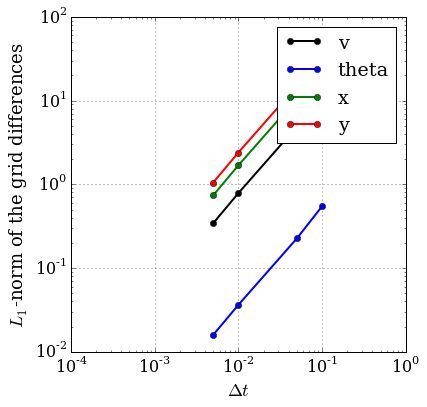

In [25]:
# log-log plot of the grid differences
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel('$\Delta t$', fontsize=18)
pyplot.ylabel('$L_1$-norm of the grid differences', fontsize=18)
pyplot.axis('equal')
pyplot.loglog(dt_values[:-1], diffgrid_v[:-1], color='k', ls='-', lw=2, marker='o')
pyplot.loglog(dt_values[:-1], diffgrid_theta[:-1], color='b', ls='-', lw=2, marker='o')
pyplot.loglog(dt_values[:-1], diffgrid_x[:-1], color='g', ls='-', lw=2, marker='o')
pyplot.loglog(dt_values[:-1], diffgrid_y[:-1], color='r', ls='-', lw=2, marker='o')
pyplot.legend(['v','theta', 'x','y']);

Order of Convergence

In [31]:
r = 2
h = 0.001

dt_values2 = numpy.array([h, r*h, r**2*h])

u_values2 = numpy.empty_like(dt_values2, dtype=numpy.ndarray)

diffgrid2_x = numpy.empty(2)
diffgrid2_y = numpy.empty(2)
diffgrid2_v = numpy.empty(2)
diffgrid2_theta = numpy.empty(2)

for i, dt in enumerate(dt_values2):
    
    N = int(T/dt) + 1   # number of time-steps
    
    ### discretize the time t ###
    t = numpy.linspace(0.0, T, N)
    
    # initialize the array containing the solution for each time-step
    u = numpy.empty((N, 4))
    u[0] = numpy.array([v0, theta0, x0, y0])

    # time loop
    for n in range(N-1):

        u[n+1] = euler_step(u[n], f, dt)         ### call euler_step() ###
    
    # store the value of u related to one grid
    u_values2[i] = u
    

#calculate f2 - f1
diffgrid2_x[0] = get_diffgrid_x(u_values2[1], u_values2[0], dt_values2[1])
diffgrid2_y[0] = get_diffgrid_y(u_values2[1], u_values2[0], dt_values2[1]) 
diffgrid2_v[0] = get_diffgrid_v(u_values2[1], u_values2[0], dt_values2[1]) 
diffgrid2_theta[0] = get_diffgrid_theta(u_values2[1], u_values2[0], dt_values2[1]) 

#calculate f3 - f2
diffgrid2_x[1] = get_diffgrid_x(u_values2[2], u_values2[1], dt_values2[2])
diffgrid2_y[1] = get_diffgrid_y(u_values2[2], u_values2[1], dt_values2[2]) 
diffgrid2_v[1] = get_diffgrid_v(u_values2[2], u_values2[1], dt_values2[2])
diffgrid2_theta[1] = get_diffgrid_theta(u_values2[2], u_values2[1], dt_values2[2]) 

# calculate the order of convergence
p_x = (log(diffgrid2_x[1]) - log(diffgrid2_x[0])) / log(r)
p_y = (log(diffgrid2_y[1]) - log(diffgrid2_y[0])) / log(r)
p_v = (log(diffgrid2_v[1]) - log(diffgrid2_v[0])) / log(r)
p_theta = (log(diffgrid2_theta[1]) - log(diffgrid2_theta[0])) / log(r)

print('The order of convergence is p_x = {:.3f}'.format(p_x))
print('The order of convergence is p_y = {:.3f}'.format(p_y))
print('The order of convergence is p_v = {:.3f}'.format(p_v))
print('The order of convergence is p_theta = {:.3f}'.format(p_theta))

The order of convergence is p_x = 1.014
The order of convergence is p_y = 1.014
The order of convergence is p_v = 1.014
The order of convergence is p_theta = 1.014
